<a href="https://colab.research.google.com/github/dongjaekim-hail/open-source-AI/blob/main/0_linear_classification_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 분류 linear classification

이전에 봤던 예시랑 같은 데이터를 이제는 분류로 봅시다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0,1,2,3])
x2 = np.array([3,2,8,10])
y  = np.array([0,0,1,1])


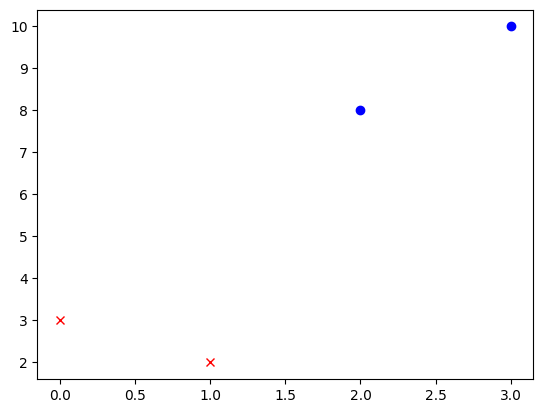

In [2]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

적절한 라인을 그려보면 둘 사이를 잘 나눌 수 있어야 할건데

LSM + MSE 를 통해서 얻은 선이 어떻게 되는지 한번 확인해보자.

In [3]:
def func(x,w):
 return w[0]+w[1]*x[0]+w[2]*x[1]

def gradient_descent(x1, x2, y, w_init, lr, iters):
  w = w_init
  for _ in range(iters):
    y_hat = func([x1, x2], w)
    grad = grad_mse(np.array([x1, x2]), y, y_hat, w)
    w = w - lr * grad
    print('w:', w)
    # print('grad:',grad)
    # print loss
    loss = np.sum((y_hat-y)**2)
    print('error:', loss)

  return w

def grad_mse(x, y, y_hat, w):
  grad_w0 = 2 * np.mean(y_hat - y)
  grad_w1 = 2 * np.mean((y_hat - y) * x[0])
  grad_w2 = 2 * np.mean((y_hat - y) * x[1])

  grad = np.array([grad_w0, grad_w1, grad_w2])

  return grad


x1 = np.array([0, 1, 2, 3])
x2 = np.array([3, 2, 8, 10])
y  = np.array([0,0,1,1])

w_init = np.array([-1,0.5,0.5])
lr = 1e-3
iters = int(1e5)

w = gradient_descent(x1, x2, y, w_init, lr, iters)

print("Learned weights:", w)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012

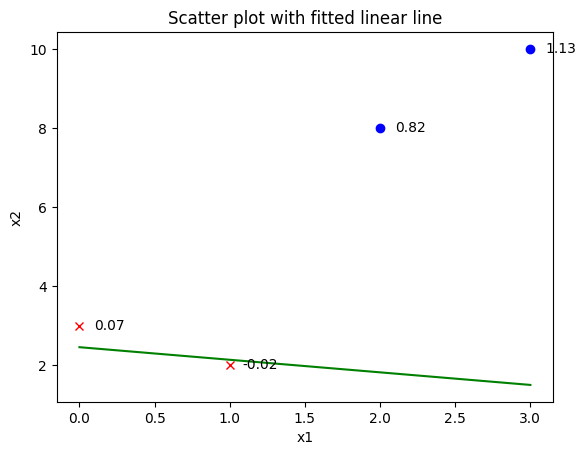

In [4]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line = -(w[0] + w[1] * x_line) / w[2]
plt.plot(x_line, y_line, 'g-')

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot with fitted linear line')

# Overlay estimated value with func
for i in range(len(y)):
    plt.text(x1[i]+0.2, x2[i], f'{func([x1[i], x2[i]], w):.2f}', ha='center', va='center')


# Show the plot
plt.show()


사실... y값을 0 또는 1이 아닌 다른 방식으로 하면 조금 더 나은 결과를 얻을 수도 있습니다.

In [5]:
def func(x,w):
 return w[0]+w[1]*x[0]+w[2]*x[1]

def gradient_descent(x1, x2, y, w_init, lr, iters):
  w = w_init
  for _ in range(iters):
    y_hat = func([x1, x2], w)
    grad = grad_mse(np.array([x1, x2]), y, y_hat, w)
    w = w - lr * grad
    print('w:', w)
    # print('grad:',grad)
    # print loss
    loss = np.sum((y_hat-y)**2)
    print('error:', loss)

  return w

def grad_mse(x, y, y_hat, w):
  grad_w0 = 2 * np.mean(y_hat - y)
  grad_w1 = 2 * np.mean((y_hat - y) * x[0])
  grad_w2 = 2 * np.mean((y_hat - y) * x[1])

  grad = np.array([grad_w0, grad_w1, grad_w2])

  return grad


x1 = np.array([0, 1, 2, 3])
x2 = np.array([3, 2, 8, 10])
y  = np.array([-1,-1,1,1])

w_init = np.array([-1,0.5,0.5])
lr = 1e-3
iters = int(1e5)

w = gradient_descent(x1, x2, y, w_init, lr, iters)

print("Learned weights:", w)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241

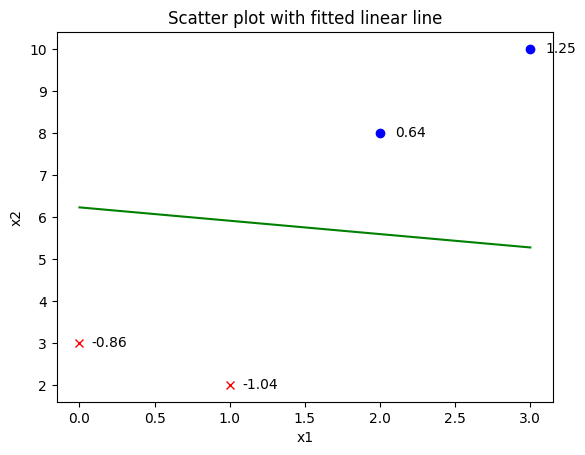

In [6]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == -1:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line = -(w[0] + w[1] * x_line) / w[2]
plt.plot(x_line, y_line, 'g-')

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot with fitted linear line')


# Overlay estimated value with func
for i in range(len(y)):
    plt.text(x1[i]+0.2, x2[i], f'{func([x1[i], x2[i]], w):.2f}', ha='center', va='center')


# Show the plot
plt.show()


In [7]:
def func(x,w):
 return w[0]+w[1]*x[0]+w[2]*x[1]

def gradient_descent(x1, x2, y, w_init, lr, iters):
  w = w_init
  for _ in range(iters):
    y_hat = func([x1, x2], w)
    grad = grad_mse(np.array([x1, x2]), y, y_hat, w)
    w = w - lr * grad
    print('w:', w)
    # print('grad:',grad)
    # print loss
    loss = np.sum((y_hat-y)**2)
    print('error:', loss)

  return w

def grad_mse(x, y, y_hat, w):
  grad_w0 = 2 * np.mean(y_hat - y)
  grad_w1 = 2 * np.mean((y_hat - y) * x[0])
  grad_w2 = 2 * np.mean((y_hat - y) * x[1])

  grad = np.array([grad_w0, grad_w1, grad_w2])

  return grad



x1 = np.array([0, 1, 2, 3])
x2 = np.array([3, 2, 8, 10])
y  = np.array([-1,-1,1,1])

w_init = np.array([-1,0.5,0.5])
lr = 1e-3
iters = int(1e5)

w = gradient_descent(x1, x2, y, w_init, lr, iters)

print("Learned weights:", w)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241

그러나 수업시간에 배웠던 대로, 데이터가 많을때 outlier 에 대해서 error가 과장되는 효과가 있습니다.

In [8]:
x1 = np.array([0, 1, 2, 3,   0, 3,])
x2 = np.array([3, 2, 8, 10,  29, 20,])
y  = np.array([-1,-1,1,1,  -1,  -1])

In [9]:
def func(x,w):
 return w[0]+w[1]*x[0]+w[2]*x[1]

def gradient_descent(x1, x2, y, w_init, lr, iters):
  w = w_init
  for _ in range(iters):
    y_hat = func([x1, x2], w)
    grad = grad_mse(np.array([x1, x2]), y, y_hat, w)
    w_prior = w
    w = w - lr * grad
    print('w:', w)
    # print('grad:',grad)
    # print loss
    loss = np.sum((y_hat-y)**2)
    print('gradient:', grad)
    print('error:', loss)
    if np.isnan(w).any():
        print('nan')
        return w_prior

  return w

def grad_mse(x, y, y_hat, w):
  grad_w0 = 2 * np.mean(y_hat - y)
  grad_w1 = 2 * np.mean((y_hat - y) * x[0])
  grad_w2 = 2 * np.mean((y_hat - y) * x[1])

  grad = np.array([grad_w0, grad_w1, grad_w2])

  return grad

w_init = np.array([-1,0.5,0.5])
lr = 1e-3
iters = int(1e5)

w = gradient_descent(x1, x2, y, w_init, lr, iters)

print("Learned weights:", w)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
error: 3.389195009183609
w: [-0.70498448  0.42105263 -0.02166065]
gradient: [-5.55111512e-14  2.73855013e-14  0.00000000e+00]
error: 3.389195009183609
w: [-0.70498448  0.42105263 -0.02166065]
gradient: [-5.55111512e-14  2.73855013e-14  0.00000000e+00]
error: 3.389195009183609
w: [-0.70498448  0.42105263 -0.02166065]
gradient: [-5.55111512e-14  2.73855013e-14  0.00000000e+00]
error: 3.389195009183609
w: [-0.70498448  0.42105263 -0.02166065]
gradient: [-5.55111512e-14  2.73855013e-14  0.00000000e+00]
error: 3.389195009183609
w: [-0.70498448  0.42105263 -0.02166065]
gradient: [-5.55111512e-14  2.73855013e-14  0.00000000e+00]
error: 3.389195009183609
w: [-0.70498448  0.42105263 -0.02166065]
gradient: [-5.55111512e-14  2.73855013e-14  0.00000000e+00]
error: 3.389195009183609
w: [-0.70498448  0.42105263 -0.02166065]
gradient: [-5.55111512e-14  2.73855013e-14  0.00000000e+00]
error: 3.389195009183609
w: [-0.70498448  0.42105263 -0.02166065]
gradient: [-5.55

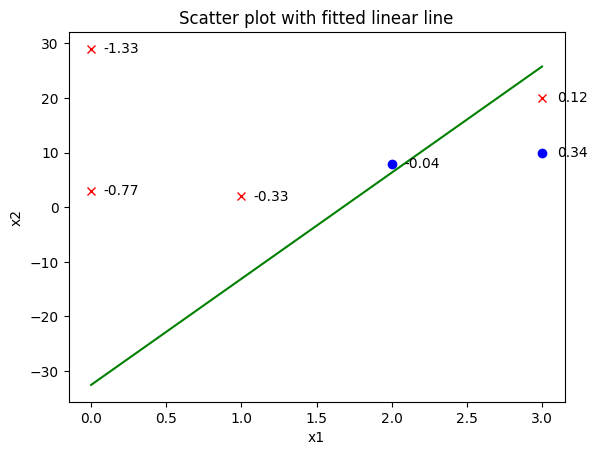

In [10]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == -1:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line = -(w[0] + w[1] * x_line) / w[2]
plt.plot(x_line, y_line, 'g-')

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot with fitted linear line')


# Overlay estimated value with func
for i in range(len(y)):
    plt.text(x1[i]+0.2, x2[i], f'{func([x1[i], x2[i]], w):.2f}', ha='center', va='center')
# plt.xlim([-1, 4])
# plt.ylim([1, 11])

# Show the plot
plt.show()


# 로지스틱 회귀



$\hat{y} = \sigma(w^T x)$

이 때 $\sigma(z) = \frac{1}{1 + e^{-z}}$, $z = w^T x$ 로 쓸수도 있다고 했을때

교차엔트로피로 loss 함수를 계산한다면,

$L = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)$

미분시 연쇄법칙에 의해서

$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w}$

$\frac{\partial L}{\partial \hat{y}} = -\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right)$

$\frac{\partial \hat{y}}{\partial z} = \hat{y} \cdot (1 - \hat{y})$

$\frac{\partial z}{\partial w} = x$


$$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w}$$
$$= \left(-\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right)\right) \cdot (\hat{y} \cdot (1 - \hat{y})) \cdot x$$
$$= (-y (1 - \hat{y}) + (1 - y) \hat{y}) \cdot x$$
$$= (\hat{y} - y) \cdot x$$


In [11]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0,1,2,3])
x2 = np.array([3,2,8,10])
y  = np.array([0,0,1,1])

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def func(x, w):
    z = w[0] + w[1]*x[0] + w[2]*x[1]
    return sigmoid(z)

def cross_entropy(y, y_hat):
    eps = 1e-6
    return -np.mean(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))



def gradient_descent(x1, x2, y, w_init, lr, iters):
    w = w_init
    for _ in range(iters):
        y_hat = func([x1, x2], w)
        grad = grad_mse(np.array([x1, x2]), y, y_hat, w)
        w_prior = w
        w = w - lr * grad
        loss = cross_entropy(y, y_hat)
        print('w:', w)
        print('error:', loss)
        if np.isnan(w).any():
            print('nan')
            return w_prior
        if np.abs(loss)<1e-6:
          return w

    return w


w_init = np.array([-1,0.5,0.5])
lr = 1e-3
iters = int(1e5)

w = gradient_descent(x1, x2, y, w_init, lr, iters)

print("Learned weights:", w)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
error: 0.018380378688229483
w: [-6.80960674  1.26145149  1.04411514]
error: 0.018380193634373425
w: [-6.80962558  1.261454    1.04411809]
error: 0.018380008584218302
w: [-6.80964443  1.26145652  1.04412103]
error: 0.01837982353776422
w: [-6.80966327  1.26145904  1.04412397]
error: 0.018379638495010894
w: [-6.80968211  1.26146156  1.04412691]
error: 0.01837945345595827
w: [-6.80970096  1.26146407  1.04412986]
error: 0.01837926842060614
w: [-6.8097198   1.26146659  1.0441328 ]
error: 0.018379083388954533
w: [-6.80973864  1.26146911  1.04413574]
error: 0.018378898361003277
w: [-6.80975749  1.26147163  1.04413868]
error: 0.018378713336752277
w: [-6.80977633  1.26147415  1.04414163]
error: 0.01837852831620142
w: [-6.80979517  1.26147666  1.04414457]
error: 0.018378343299350532
w: [-6.80981401  1.26147918  1.04414751]
error: 0.01837815828619961
w: [-6.80983286  1.2614817   1.04415045]
error: 0.018377973276748453
w: [-6.8098517   1.26148422  1.04415339]
err

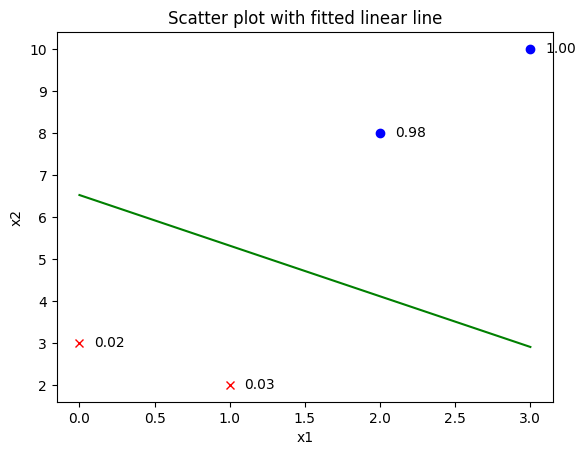

In [13]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line = -(w[0] + w[1] * x_line) / w[2]
plt.plot(x_line, y_line, 'g-')

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot with fitted linear line')


# Overlay estimated value with func
for i in range(len(y)):
    plt.text(x1[i]+0.2, x2[i], f'{func([x1[i], x2[i]], w):.2f}', ha='center', va='center')


# Show the plot
plt.show()


In [14]:
x1 = np.array([0, 1, 2, 3,   0, 3,])
x2 = np.array([3, 2, 8, 10,  29, 20,])
y  = np.array([0,0,1,1,  0,0])

In [15]:
w_init = np.array([-1,0.5,0.5])
lr = 1e-3
iters = int(1e5)

w = gradient_descent(x1, x2, y, w_init, lr, iters)

print("Learned weights:", w)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
error: 0.16098229579726045
w: [-4.7053205   5.28300004 -0.65883952]
error: 0.1609816906427454
w: [-4.70534483  5.28302476 -0.65884219]
error: 0.1609810854937985
w: [-4.70536915  5.28304949 -0.65884485]
error: 0.16098048035041965
w: [-4.70539348  5.28307422 -0.65884752]
error: 0.16097987521260873
w: [-4.70541781  5.28309894 -0.65885019]
error: 0.16097927008036553
w: [-4.70544213  5.28312367 -0.65885285]
error: 0.16097866495369015
w: [-4.70546646  5.28314839 -0.65885552]
error: 0.16097805983258237
w: [-4.70549079  5.28317312 -0.65885818]
error: 0.16097745471704206
w: [-4.70551511  5.28319784 -0.65886085]
error: 0.16097684960706904
w: [-4.70553944  5.28322257 -0.65886352]
error: 0.16097624450266335
w: [-4.70556376  5.28324729 -0.65886618]
error: 0.1609756394038249
w: [-4.70558809  5.28327202 -0.65886885]
error: 0.16097503431055335
w: [-4.70561242  5.28329674 -0.65887151]
error: 0.16097442922284874
w: [-4.70563674  5.28332147 -0.65887418]
error: 0.160973

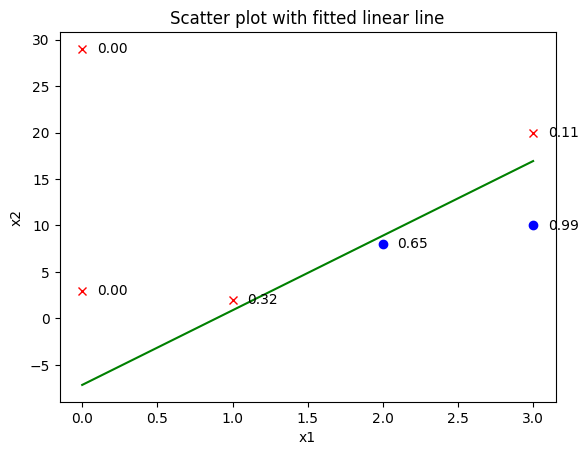

In [16]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line = -(w[0] + w[1] * x_line) / w[2]
plt.plot(x_line, y_line, 'g-')

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot with fitted linear line')


# Overlay estimated value with func
for i in range(len(y)):
    plt.text(x1[i]+0.2, x2[i], f'{func([x1[i], x2[i]], w):.2f}', ha='center', va='center')
# plt.xlim([-1, 4])
# plt.ylim([1, 11])

# Show the plot
plt.show()
